In [94]:
import os
import pandas as pd
import numpy as np

from database_processing_functions import *
from create_data_matrix import *
import matplotlib.pyplot as plt

# Load the surrogate_perfomance data
surrogate_performance = pd.read_csv('surrogate_performance_data.csv')
surrogate_performance.head()


,name,test_or_train,type,rmse_cal,rmse_sur,energy_cal,energy_sur,stiff_cal,stiff_sur,a1,a2,a3,a4,a5,a6
0,"Davey 1975, No. 2",test,Flexure,0.003016,0.003041,0.003371,0.003442,0.951227,1.013803,0.181818,0.304296,0.001880,0.058293,0.600000,0.429439
1,"Davey 1975, No. 3",train,Flexure,0.003788,0.005232,0.001014,0.002869,1.036885,1.071996,0.285714,0.288749,0.001793,0.055613,0.600000,0.528389
2,"Munro et al. 1976, No. 1",train,Flexure,0.001941,0.002567,0.005664,0.011965,0.949847,0.951088,0.153846,0.298894,0.002024,0.057258,0.600000,0.369010
3,"Ng et al. 1978, No. 2",train,Flexure,0.003297,0.003710,0.026636,0.013202,1.021515,1.079709,0.183150,0.206522,0.002947,0.003361,1.411765,0.115615
4,"Ng et al. 1978, No. 3",test,Flexure,0.001481,0.002961,0.007253,0.029031,0.948125,0.884900,0.186567,0.234963,0.002781,0.009809,1.885714,0.123810


Text(0.5, 0.5, 'Axial Load Ratio')

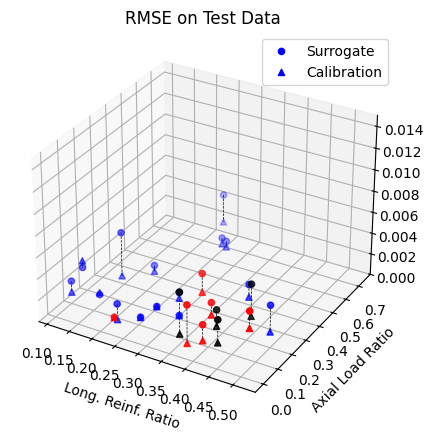

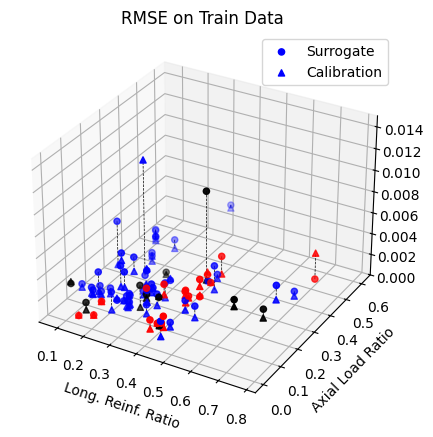

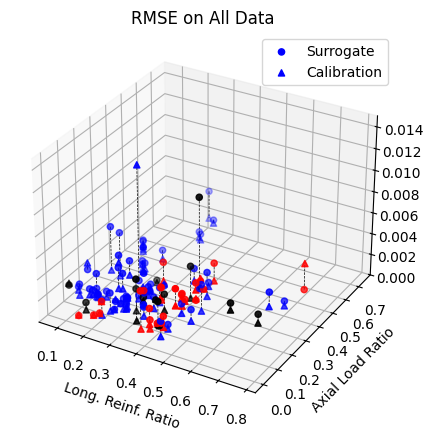

In [95]:
# Generate 3D scatter plot
pars = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6']

# Parameter labels [ar, lrr, srr, alr, sdr, smr]
par_labels = ['Aspect Ratio $D/L$', 'Long. Reinf. Ratio', 'Trans. Reinf. Ratio', 'Axial Load Ratio', 'Spacing', '$V_f/V_s$']

xpar_index, ypar_index = 1, 3

xpar = pars[xpar_index]
ypar = pars[ypar_index]

# Labels for the plots
xpar_label = par_labels[xpar_index]
ypar_label = par_labels[ypar_index]

# Filter only test data
test_data = surrogate_performance[surrogate_performance['test_or_train'] == 'test']
# Plot properties
dpi_plots = 100
figuresize = (5, 5)
colors = {'Flexure': 'b', 'Flexure-Shear': 'k', 'Shear': 'r'}

# Create a 3D scatter plot of rmse_sur 
fig = plt.figure(dpi=dpi_plots, figsize=figuresize)
ax = fig.add_subplot(111, projection='3d')

# Create a color map based on FailureType
color_values = test_data['type'].map(colors)
ax.scatter(test_data[xpar], test_data[ypar], test_data['rmse_sur'], c=color_values, marker='o', label='Surrogate')
# Add rmse_cal
ax.scatter(test_data[xpar], test_data[ypar], test_data['rmse_cal'], c=color_values, marker='^', label='Calibration')  
# Join both with vertical lines

for i in range(len(test_data)):
    ax.plot([test_data[xpar].iloc[i], test_data[xpar].iloc[i]], 
            [test_data[ypar].iloc[i], test_data[ypar].iloc[i]], 
            [test_data['rmse_sur'].iloc[i], test_data['rmse_cal'].iloc[i]], c='k', linestyle='--', linewidth=0.5)
    
ax.legend()
plt.title('RMSE on Test Data')
ax.set_zlim(0, 0.015)
#ax.set_ylim(0, 2)
# Add labels for x and y axes
ax.set_xlabel(xpar_label)
ax.set_ylabel(ypar_label)


# Same as above for train data

# Filter only train data
train_data = surrogate_performance[surrogate_performance['test_or_train'] == 'train']

fig = plt.figure(dpi=dpi_plots, figsize=figuresize)
ax = fig.add_subplot(111, projection='3d')

# Create a color map based on FailureType
color_values = train_data['type'].map(colors)

# Create a 3D scatter plot of rmse_sur
ax.scatter(train_data[xpar], train_data[ypar], train_data['rmse_sur'], c=color_values, marker='o', label='Surrogate')
# Add rmse_cal
ax.scatter(train_data[xpar], train_data[ypar], train_data['rmse_cal'], c=color_values, marker='^', label='Calibration')
# Join both with vertical lines
for i in range(len(train_data)):
    ax.plot([train_data[xpar].iloc[i], train_data[xpar].iloc[i]], 
            [train_data[ypar].iloc[i], train_data[ypar].iloc[i]], 
            [train_data['rmse_sur'].iloc[i], train_data['rmse_cal'].iloc[i]], c='k', linestyle='--', linewidth=0.5)
    
ax.legend()
plt.title('RMSE on Train Data')
ax.set_zlim(0, 0.015)
ax.set_xlabel(xpar_label)
ax.set_ylabel(ypar_label)
# ax.set_ylim(0, 2)

# Do same with all data
all_data = surrogate_performance
fig = plt.figure(dpi=dpi_plots, figsize=figuresize)
ax = fig.add_subplot(111, projection='3d')
# Create a 3D scatter plot of rmse_sur

# Create a color map based on FailureType

color_values = all_data['type'].map(colors)

# Create a 3D scatter plot of rmse_sur with color based on FailureType
ax.scatter(all_data[xpar], all_data[ypar], all_data['rmse_sur'], c=color_values, marker='o', label='Surrogate')
ax.scatter(all_data[xpar], all_data[ypar], all_data['rmse_cal'], c=color_values, marker='^', label='Calibration')

# Join both with vertical lines
for i in range(len(all_data)):
    ax.plot([all_data[xpar].iloc[i], all_data[xpar].iloc[i]], 
            [all_data[ypar].iloc[i], all_data[ypar].iloc[i]], 
            [all_data['rmse_sur'].iloc[i], all_data['rmse_cal'].iloc[i]], c='k', linestyle='--', linewidth=0.5)

ax.legend()
plt.title('RMSE on All Data')
ax.set_zlim(0, 0.015)
ax.set_xlabel(xpar_label)
ax.set_ylabel(ypar_label)
#ax.set_ylim(0, 2)
    

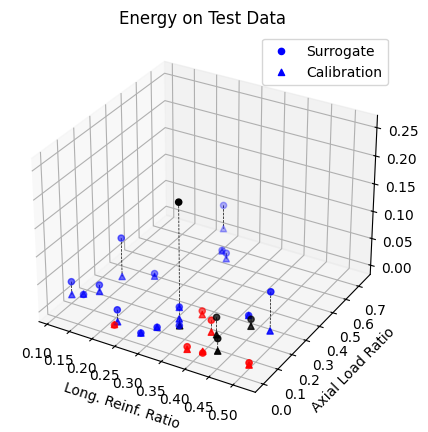

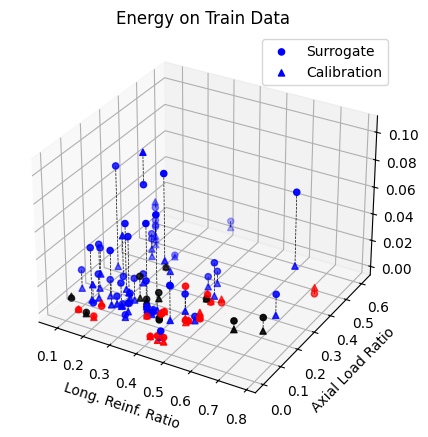

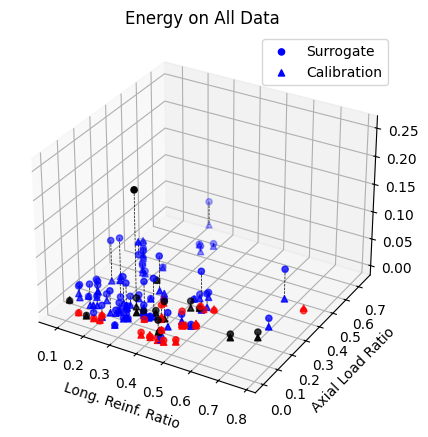

In [96]:
# Now, do same as above for energy_cal and energy_sur

# Generate 3D scatter plot

# Filter only test data
test_data = surrogate_performance[surrogate_performance['test_or_train'] == 'test']
# Create a 3D scatter plot of energy_sur
fig = plt.figure(dpi=dpi_plots, figsize=figuresize)
ax = fig.add_subplot(111, projection='3d')

# Create a color map based on FailureType
color_values = test_data['type'].map(colors)

ax.scatter(test_data[xpar], test_data[ypar], test_data['energy_sur'], c=color_values, marker='o', label='Surrogate')
# Add energy_cal
ax.scatter(test_data[xpar], test_data[ypar], test_data['energy_cal'], c=color_values, marker='^', label='Calibration')
# Join both with vertical lines
for i in range(len(test_data)):
    ax.plot([test_data[xpar].iloc[i], test_data[xpar].iloc[i]], 
            [test_data[ypar].iloc[i], test_data[ypar].iloc[i]], 
            [test_data['energy_sur'].iloc[i], test_data['energy_cal'].iloc[i]], c='k', linestyle='--', linewidth=0.5)

ax.legend()
plt.title('Energy on Test Data')
ax.set_xlabel(xpar_label)
ax.set_ylabel(ypar_label)
# ax.set_ylim(0, 2)

# Do same for train data
train_data = surrogate_performance[surrogate_performance['test_or_train'] == 'train']
fig = plt.figure(dpi=dpi_plots, figsize=figuresize)
ax = fig.add_subplot(111, projection='3d')

# Create a color map based on FailureType
color_values = train_data['type'].map(colors)

# Create a 3D scatter plot of energy_sur
ax.scatter(train_data[xpar], train_data[ypar], train_data['energy_sur'], c=color_values, marker='o', label='Surrogate')
# Add energy_cal
ax.scatter(train_data[xpar], train_data[ypar], train_data['energy_cal'], c=color_values, marker='^', label='Calibration')
# Join both with vertical lines
for i in range(len(train_data)):
    ax.plot([train_data[xpar].iloc[i], train_data[xpar].iloc[i]], 
            [train_data[ypar].iloc[i], train_data[ypar].iloc[i]], 
            [train_data['energy_sur'].iloc[i], train_data['energy_cal'].iloc[i]], c='k', linestyle='--', linewidth=0.5)

ax.legend()
plt.title('Energy on Train Data')
ax.set_xlabel(xpar_label)
ax.set_ylabel(ypar_label)
# ax.set_ylim(0, 2)

# Do same for all data
all_data = surrogate_performance
fig = plt.figure(dpi=dpi_plots, figsize=figuresize)
ax = fig.add_subplot(111, projection='3d')

# Create a color map based on FailureType
color_values = all_data['type'].map(colors)

# Create a 3D scatter plot of energy_sur
ax.scatter(all_data[xpar], all_data[ypar], all_data['energy_sur'], c=color_values, marker='o', label='Surrogate')
# Add energy_cal
ax.scatter(all_data[xpar], all_data[ypar], all_data['energy_cal'], c=color_values, marker='^', label='Calibration')
# Join both with vertical lines
for i in range(len(all_data)):
    ax.plot([all_data[xpar].iloc[i], all_data[xpar].iloc[i]], 
            [all_data[ypar].iloc[i], all_data[ypar].iloc[i]], 
            [all_data['energy_sur'].iloc[i], all_data['energy_cal'].iloc[i]], c='k', linestyle='--', linewidth=0.5)

ax.legend()
plt.title('Energy on All Data')
ax.set_xlabel(xpar_label)
ax.set_ylabel(ypar_label)
#ax.set_ylim(0, 2)

plt.show()  # Show all plots

In [ ]:
# Do same as above but for stiff_cal and stiff_sur
# Generate 3D scatter plot
# Filter only test data
test_data = surrogate_performance[surrogate_performance['test_or_train'] == 'test']
# Create a 3D scatter plot of stiff_sur
fig = plt.figure(dpi=dpi_plots, figsize=figuresize)
ax = fig.add_subplot(111, projection='3d')
# Create a color map based on FailureType
color_values = test_data['type'].map(colors)
ax.scatter(test_data[xpar], test_data[ypar], test_data['stiff_sur'], c=color_values, marker='o', label='Surrogate')
# Add stiff_cal
ax.scatter(test_data[xpar], test_data[ypar], test_data['stiff_cal'], c=color_values, marker='^', label='Calibration')
# Join both with vertical lines
for i in range(len(test_data)):
    ax.plot([test_data[xpar].iloc[i], test_data[xpar].iloc[i]], 
            [test_data[ypar].iloc[i], test_data[ypar].iloc[i]], 
            [test_data['stiff_sur'].iloc[i], test_data['stiff_cal'].iloc[i]], c='k', linestyle='--', linewidth=0.5)
ax.legend()
plt.title('Stiffness on Test Data')
ax.set_xlabel(xpar_label)
ax.set_ylabel(ypar_label)
# ax.set_ylim(0, 2)
# Do same for train data
train_data = surrogate_performance[surrogate_performance['test_or_train'] == 'train']
fig = plt.figure(dpi=dpi_plots, figsize=figuresize)
ax = fig.add_subplot(111, projection='3d')
# Create a color map based on FailureType
color_values = train_data['type'].map(colors)
# Create a 3D scatter plot of stiff_sur
ax.scatter(train_data[xpar], train_data[ypar], train_data['stiff_sur'], c=color_values, marker='o', label='Surrogate')
# Add stiff_cal
ax.scatter(train_data[xpar], train_data[ypar], train_data['stiff_cal'], c=color_values, marker='^', label='Calibration')
# Join both with vertical lines

for i in range(len(train_data)):
    ax.plot([train_data[xpar].iloc[i], train_data[xpar].iloc[i]], 
            [train_data[ypar].iloc[i], train_data[ypar].iloc[i]], 
            [train_data['stiff_sur'].iloc[i], train_data['stiff_cal'].iloc[i]], c='k', linestyle='--', linewidth=0.5)
ax.legend()
plt.title('Stiffness on Train Data')
ax.set_xlabel(xpar_label)
ax.set_ylabel(ypar_label)
# ax.set_ylim(0, 2)
# Do same for all data
all_data = surrogate_performance
fig = plt.figure(dpi=dpi_plots, figsize=figuresize)
ax = fig.add_subplot(111, projection='3d')

# Create a color map based on FailureType
color_values = all_data['type'].map(colors)
# Create a 3D scatter plot of stiff_sur
ax.scatter(all_data[xpar], all_data[ypar], all_data['stiff_sur'], c=color_values, marker='o', label='Surrogate')
# Add stiff_cal
ax.scatter(all_data[xpar], all_data[ypar], all_data['stiff_cal'], c=color_values, marker='^', label='Calibration')
# Join both with vertical lines
for i in range(len(all_data)):
    ax.plot([all_data[xpar].iloc[i], all_data[xpar].iloc[i]], 
            [all_data[ypar].iloc[i], all_data[ypar].iloc[i]], 
            [all_data['stiff_sur'].iloc[i], all_data['stiff_cal'].iloc[i]], c='k', linestyle='--', linewidth=0.5)
    
ax.legend()
plt.title('Stiffness on All Data')
ax.set_xlabel(xpar_label)
ax.set_ylabel(ypar_label)
#ax.set_ylim(0, 2)
plt.show()  # Show all plots